## Gather

In [174]:
#import the required libraries 
import pandas as pd 
import matplotlib.pyplot as plt
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer
import numpy as np

In [175]:
#Reading Twitter Archive File 
archive=pd.read_csv('twitter-archive-enhanced-2.csv')

In [176]:
#Reading Image Prediction File
img_pre=pd.read_csv('image-predictions-3.tsv', sep='\t')

In [ ]:
# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = archive.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

In [177]:
#Reading JSON file 
df_list = []
with open ('tweet_json', 'r') as file:
    for j in file:
        data = json.loads(j)
        
        #Append to list of dictionaries 
        df_list.append({'tweet_id':data['id'],
                      'retweet_count':data['retweet_count'],
                      'fave_count':data['favorite_count']})

In [178]:
print (data.keys())

dict_keys(['created_at', 'id', 'id_str', 'full_text', 'truncated', 'display_text_range', 'entities', 'extended_entities', 'source', 'in_reply_to_status_id', 'in_reply_to_status_id_str', 'in_reply_to_user_id', 'in_reply_to_user_id_str', 'in_reply_to_screen_name', 'user', 'geo', 'coordinates', 'place', 'contributors', 'is_quote_status', 'retweet_count', 'favorite_count', 'favorited', 'retweeted', 'possibly_sensitive', 'possibly_sensitive_appealable', 'lang'])


In [179]:
#Create Dataframe
data_df = pd.DataFrame(df_list,columns=['tweet_id','retweet_count','fave_count'])

## Assess

In [180]:
archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [181]:
archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [182]:
archive.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [183]:
img_pre

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [184]:
img_pre.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [185]:
img_pre.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [186]:
img_pre[img_pre.jpg_url.duplicated()]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1297,752309394570878976,https://pbs.twimg.com/ext_tw_video_thumb/67535...,1,upright,0.303415,False,golden_retriever,0.181351,True,Brittany_spaniel,0.162084,True
1315,754874841593970688,https://pbs.twimg.com/media/CWza7kpWcAAdYLc.jpg,1,pug,0.272205,True,bull_mastiff,0.251530,True,bath_towel,0.116806,False
1333,757729163776290825,https://pbs.twimg.com/media/CWyD2HGUYAQ1Xa7.jpg,2,cash_machine,0.802333,False,schipperke,0.045519,True,German_shepherd,0.023353,True
1345,759159934323924993,https://pbs.twimg.com/media/CU1zsMSUAAAS0qW.jpg,1,Irish_terrier,0.254856,True,briard,0.227716,True,soft-coated_wheaten_terrier,0.223263,True
1349,759566828574212096,https://pbs.twimg.com/media/CkNjahBXAAQ2kWo.jpg,1,Labrador_retriever,0.967397,True,golden_retriever,0.016641,True,ice_bear,0.014858,False
1364,761371037149827077,https://pbs.twimg.com/tweet_video_thumb/CeBym7...,1,brown_bear,0.713293,False,Indian_elephant,0.172844,False,water_buffalo,0.038902,False
1368,761750502866649088,https://pbs.twimg.com/media/CYLDikFWEAAIy1y.jpg,1,golden_retriever,0.586937,True,Labrador_retriever,0.398260,True,kuvasz,0.005410,True
1387,766078092750233600,https://pbs.twimg.com/media/ChK1tdBWwAQ1flD.jpg,1,toy_poodle,0.420463,True,miniature_poodle,0.132640,True,Chesapeake_Bay_retriever,0.121523,True
1407,770093767776997377,https://pbs.twimg.com/media/CkjMx99UoAM2B1a.jpg,1,golden_retriever,0.843799,True,Labrador_retriever,0.052956,True,kelpie,0.035711,True
1417,771171053431250945,https://pbs.twimg.com/media/CVgdFjNWEAAxmbq.jpg,3,Samoyed,0.978833,True,Pomeranian,0.012763,True,Eskimo_dog,0.001853,True


In [187]:
data_df

,tweet_id,retweet_count,fave_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048
5,891087950875897856,3261,20562
6,890971913173991426,2158,12041
7,890729181411237888,16716,56848
8,890609185150312448,4429,28226
9,890240255349198849,7711,32467


In [188]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
tweet_id         2354 non-null int64
retweet_count    2354 non-null int64
fave_count       2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


In [189]:
all_columns = pd.Series(list(archive) + list(img_pre) + list(data_df))
all_columns[all_columns.duplicated()]

17    tweet_id
29    tweet_id
dtype: object

### I. Quality

##### A. `Twitter Archive` table: 
     1. Missing values 'in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp'&'expanded_urls'
     2. Wrong data type for 'timestamp'. It should be datetime
     3. Woring data type for 'tweet_id'. It should be object (string)
     4. Wrong data type for ''rating_numerator'. It should be float
     5. 'rating_denominator' has unrealistic values
     6. 'rating_numerator' has extreme outliers  	
     7. Some dog names are not meaningful such as (the, an, a ...) 
     8. null represented by 'None' in 'name', 'doggo','floofer','pupper' &'puppo'
     9. according to 'text', some tweets are acutally retweets 
    10. 137 duplications in 'expanded_urls'
    11. 'source' contains unneccessary tags 
     
##### B. `Image Prediction` Table:
     1. Woring data type for 'tweet_id'. It should be object (string)
     2. 66 duplications in 'jpg_url'

### II. Tidiness

- ` Twitter Archive`: 4 columns ('doggo','floofer', 'pupper', 'puppo') should be one column with category type
- ` Twitter Archive`: 'expanded_urls' has multiple values (URLs) in the same cell
- All three tables should be combined in one table 

## Clean

In [190]:
#Creating a copy of each table

archive_clean = archive.copy()
img_pre_clean = img_pre.copy()
data_df_clean = data_df.copy()

### Missing Data

#### ` Twitter Archive`: Missing values in 'in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id' & 'retweeted_status_timestamp'

##### Define

Drop unneeded columns: 'in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id','retweeted_status_user_id'&'retweeted_status_timestamp'

##### Code

In [191]:
archive_clean = archive_clean.drop(['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp'],axis=1)

##### Test

In [192]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2356 non-null int64
timestamp             2356 non-null object
source                2356 non-null object
text                  2356 non-null object
expanded_urls         2297 non-null object
rating_numerator      2356 non-null int64
rating_denominator    2356 non-null int64
name                  2356 non-null object
doggo                 2356 non-null object
floofer               2356 non-null object
pupper                2356 non-null object
puppo                 2356 non-null object
dtypes: int64(3), object(9)
memory usage: 221.0+ KB


#### ` Twitter Archive`: Missing values in 'expanded_urls'

##### Define

Drop the rows with missing values 

##### Code

In [193]:
archive_clean = archive_clean[archive_clean['expanded_urls'].notnull()]

##### Test

In [194]:
#Confirm no null values in expanded_urls column. should return empty
archive_clean[archive_clean['expanded_urls'].isnull()]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [195]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2297 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2297 non-null int64
timestamp             2297 non-null object
source                2297 non-null object
text                  2297 non-null object
expanded_urls         2297 non-null object
rating_numerator      2297 non-null int64
rating_denominator    2297 non-null int64
name                  2297 non-null object
doggo                 2297 non-null object
floofer               2297 non-null object
pupper                2297 non-null object
puppo                 2297 non-null object
dtypes: int64(3), object(9)
memory usage: 233.3+ KB


### Tidiness

#### ` Twitter Archive`: 4 columns ('doggo','floofer', 'pupper', 'puppo') should be one column with category type

##### Define

- Replace all 'None' with '' 
- Merge *pupper*, *doggo*, *puppo* and *floofer* columns to *stage* column
- Drop *pupper*, *doggo*, *puppo* and *floofer* columns

##### Code

In [196]:
#Merge the columns 
archive_clean['stage'] = archive_clean[archive_clean.columns[8:]].apply(
    lambda x: ''.join(x),
    axis=1
)

In [197]:
#Remove 'None' 
archive_clean['stage'] = archive_clean['stage'].str.replace('None','')


In [198]:
#Drop *pupper*, *doggo*, *puppo* and *floofer* columns 
archive_clean = archive_clean.drop(['pupper','doggo','puppo','floofer'],axis=1)

##### Test

In [199]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2297 entries, 0 to 2355
Data columns (total 9 columns):
tweet_id              2297 non-null int64
timestamp             2297 non-null object
source                2297 non-null object
text                  2297 non-null object
expanded_urls         2297 non-null object
rating_numerator      2297 non-null int64
rating_denominator    2297 non-null int64
name                  2297 non-null object
stage                 2297 non-null object
dtypes: int64(3), object(6)
memory usage: 179.5+ KB


In [200]:
archive_clean['stage'].value_counts()

                1923
pupper           243
doggo             80
puppo             28
doggopupper       12
floofer            9
doggopuppo         1
doggofloofer       1
Name: stage, dtype: int64

### Quality

### Wrong Data Type

#### ` Twitter Archive`: Wrong data type for 'timestamp'. It should be datetime

##### Define

Convert 'timestamp' column to datetime

##### Code

In [201]:
archive_clean['timestamp'] = pd.to_datetime(archive_clean['timestamp'])

##### Test

In [202]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2297 entries, 0 to 2355
Data columns (total 9 columns):
tweet_id              2297 non-null int64
timestamp             2297 non-null datetime64[ns]
source                2297 non-null object
text                  2297 non-null object
expanded_urls         2297 non-null object
rating_numerator      2297 non-null int64
rating_denominator    2297 non-null int64
name                  2297 non-null object
stage                 2297 non-null object
dtypes: datetime64[ns](1), int64(3), object(5)
memory usage: 179.5+ KB


#### Woring data type for 'tweet_id'. It should be object (string)

##### Define

Convert 'tweet_id' to string in all tables

##### Code

In [203]:
archive_clean.tweet_id = archive_clean.tweet_id.astype(str)
img_pre_clean.tweet_id = img_pre_clean.tweet_id.astype(str)
data_df_clean.tweet_id = data_df_clean.tweet_id.astype(str)

##### Test

In [204]:
archive_clean.info()
img_pre_clean.info()
data_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2297 entries, 0 to 2355
Data columns (total 9 columns):
tweet_id              2297 non-null object
timestamp             2297 non-null datetime64[ns]
source                2297 non-null object
text                  2297 non-null object
expanded_urls         2297 non-null object
rating_numerator      2297 non-null int64
rating_denominator    2297 non-null int64
name                  2297 non-null object
stage                 2297 non-null object
dtypes: datetime64[ns](1), int64(2), object(6)
memory usage: 179.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null object
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null obj

#### Woring data type for 'rating_numerator '. It should be float

##### Define

Convert rating_numerator to float

##### Code

In [205]:
archive_clean.rating_numerator = archive_clean.rating_numerator.astype(float)

##### Test

In [206]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2297 entries, 0 to 2355
Data columns (total 9 columns):
tweet_id              2297 non-null object
timestamp             2297 non-null datetime64[ns]
source                2297 non-null object
text                  2297 non-null object
expanded_urls         2297 non-null object
rating_numerator      2297 non-null float64
rating_denominator    2297 non-null int64
name                  2297 non-null object
stage                 2297 non-null object
dtypes: datetime64[ns](1), float64(1), int64(1), object(6)
memory usage: 179.5+ KB


#### 'rating_denominator' has unrealistic values

##### Define

- Fix the denominator to 10, so we can have standard rating by dropping all rows with denominator != 10
- Drop 'rating_denominator' column, since it adds no value 

##### Code

In [207]:
archive_clean = archive_clean[archive_clean['rating_denominator']==10]

In [208]:
archive_clean = archive_clean.drop(['rating_denominator'],axis=1)

##### Test

In [209]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2278 entries, 0 to 2355
Data columns (total 8 columns):
tweet_id            2278 non-null object
timestamp           2278 non-null datetime64[ns]
source              2278 non-null object
text                2278 non-null object
expanded_urls       2278 non-null object
rating_numerator    2278 non-null float64
name                2278 non-null object
stage               2278 non-null object
dtypes: datetime64[ns](1), float64(1), object(6)
memory usage: 160.2+ KB


#### 'rating_numerator' has unrealistic values

##### Define

Drop rows with numerator greater than 15

##### Code

In [210]:
archive_clean = archive_clean[archive_clean['rating_numerator']<= 15]

##### Test

In [211]:
archive_clean.rating_numerator.value_counts()

12.0    547
10.0    455
11.0    455
13.0    339
9.0     154
8.0     102
7.0      52
14.0     50
5.0      35
6.0      32
3.0      19
4.0      15
2.0       9
1.0       5
0.0       2
15.0      1
Name: rating_numerator, dtype: int64

In [212]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2272 entries, 0 to 2355
Data columns (total 8 columns):
tweet_id            2272 non-null object
timestamp           2272 non-null datetime64[ns]
source              2272 non-null object
text                2272 non-null object
expanded_urls       2272 non-null object
rating_numerator    2272 non-null float64
name                2272 non-null object
stage               2272 non-null object
dtypes: datetime64[ns](1), float64(1), object(6)
memory usage: 159.8+ KB


#### Some dog names are not meaningful such as (the, an, a ...)

##### Define

- Find all rows with not meaningful names
- Rename it to None

##### Code

In [213]:
archive_clean.name.value_counts()

None            671
a                54
Charlie          12
Lucy             11
Oliver           11
Cooper           11
Lola             10
Tucker           10
Penny            10
Winston           9
Bo                9
Sadie             8
the               8
Toby              7
Buddy             7
Bailey            7
Daisy             7
Dave              6
Koda              6
an                6
Bella             6
Rusty             6
Oscar             6
Jack              6
Milo              6
Jax               6
Leo               6
Stanley           6
Scout             6
Alfie             5
               ... 
Ike               1
Odin              1
Clyde             1
Timmy             1
Anthony           1
Zooey             1
Sprout            1
Monster           1
Ralpher           1
Ricky             1
Loomis            1
Beemo             1
Shikha            1
Terrenth          1
Joshwa            1
Dante             1
Willie            1
Sora              1
Taco              1


In [214]:
archive_clean['name'] = archive_clean['name'].replace(['a','the','an'], 'None')

##### Test

In [215]:
archive_clean['name'].value_counts()

None         739
Charlie       12
Oliver        11
Cooper        11
Lucy          11
Lola          10
Penny         10
Tucker        10
Bo             9
Winston        9
Sadie          8
Toby           7
Buddy          7
Daisy          7
Bailey         7
Leo            6
Milo           6
Jack           6
Rusty          6
Jax            6
Dave           6
Scout          6
Bella          6
Oscar          6
Stanley        6
Koda           6
Bentley        5
George         5
Alfie          5
Sammy          5
            ... 
Jaycob         1
Bode           1
Mairi          1
Mojo           1
Dietrich       1
Birf           1
Chuq           1
Jordy          1
Evy            1
Kaiya          1
Hubertson      1
Dex            1
Ridley         1
Dook           1
Goose          1
Randall        1
Bobble         1
Dwight         1
Tom            1
Spanky         1
Bubba          1
Sully          1
Creg           1
Tilly          1
Pubert         1
Chesney        1
space          1
Harnold       

#### 137 duplications in 'expanded_urls'

##### Define

Drop the duplicated expanded_urls if necessary

##### Code

In [216]:
#idenify the duplicated values
archive_clean[archive_clean.expanded_urls.duplicated()]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,name,stage
75,878281511006478336,2017-06-23 16:00:04,"<a href=""http://twitter.com/download/iphone"" r...",Meet Shadow. In an attempt to reach maximum zo...,"https://www.gofundme.com/3yd6y1c,https://twitt...",13.0,Shadow,
76,878057613040115712,2017-06-23 01:10:23,"<a href=""http://twitter.com/download/iphone"" r...",This is Emmy. She was adopted today. Massive r...,https://twitter.com/dog_rates/status/878057613...,14.0,Emmy,
98,873213775632977920,2017-06-09 16:22:42,"<a href=""http://twitter.com/download/iphone"" r...",This is Sierra. She's one precious pupper. Abs...,https://www.gofundme.com/help-my-baby-sierra-g...,12.0,Sierra,pupper
126,868552278524837888,2017-05-27 19:39:34,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Cooper. His expression is the sam...,"https://www.gofundme.com/3ti3nps,https://twitt...",12.0,Cooper,
135,866450705531457537,2017-05-22 00:28:40,"<a href=""http://twitter.com/download/iphone"" r...",This is Jamesy. He gives a kiss to every other...,https://twitter.com/dog_rates/status/866450705...,13.0,Jamesy,pupper
136,866334964761202691,2017-05-21 16:48:45,"<a href=""http://twitter.com/download/iphone"" r...",This is Coco. At first I thought she was a clo...,https://twitter.com/dog_rates/status/866334964...,12.0,Coco,
150,863062471531167744,2017-05-12 16:05:02,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Quinn. She's quite the goofball. ...,"https://www.gofundme.com/helpquinny,https://tw...",13.0,Quinn,
161,860563773140209665,2017-05-05 18:36:06,"<a href=""http://twitter.com/download/iphone"" r...",Meet Lorenzo. He's an avid nifty hat wearer an...,https://www.gofundme.com/help-lorenzo-beat-can...,13.0,Lorenzo,
169,859196978902773760,2017-05-02 00:04:57,"<a href=""http://twitter.com/download/iphone"" r...",We only rate dogs. This is quite clearly a smo...,https://twitter.com/dog_rates/status/859196978...,12.0,quite,
253,844704788403113984,2017-03-23 00:18:10,"<a href=""http://twitter.com/download/iphone"" r...",This is Luna. It's her first time outside and ...,https://twitter.com/dog_rates/status/844704788...,13.0,Luna,


In [217]:
archive_clean.expanded_urls.value_counts()

https://twitter.com/dog_rates/status/753375668877008896/photo/1                                                                                                                                                                                                                                              2
https://twitter.com/dog_rates/status/718631497683582976/photo/1                                                                                                                                                                                                                                              2
https://www.gofundme.com/help-lorenzo-beat-cancer,https://twitter.com/dog_rates/status/860563773140209665/photo/1,https://twitter.com/dog_rates/status/860563773140209665/photo/1                                                                                                                            2
https://twitter.com/dog_rates/status/780931614150983680/photo/1                            

In [218]:
archive_clean.loc[archive_clean['expanded_urls'] == 'https://twitter.com/dog_rates/status/839549326359670784/photo/1']

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,name,stage
171,858860390427611136,2017-05-01 01:47:28,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Winston. He knows he's a l...,https://twitter.com/dog_rates/status/839549326...,12.0,Winston,
280,839549326359670784,2017-03-08 18:52:12,"<a href=""http://twitter.com/download/iphone"" r...",Meet Winston. He knows he's a little too big f...,https://twitter.com/dog_rates/status/839549326...,12.0,Winston,


In [219]:
# the duplicated values are retweets of the original tweet, drop the retweet and keep the original
archive_clean = archive_clean.drop_duplicates(subset='expanded_urls',keep='last')

##### Test

In [220]:
#Confirm no duplications on 'expanded_urls', must return empty
archive_clean[archive_clean.expanded_urls.duplicated()]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,name,stage


#### 66 duplications in 'jpg_url'

##### Define

Drop the duplicated jpg_url if necessary

##### Code

In [221]:
#idenify the duplicated values
img_pre_clean[img_pre_clean.jpg_url.duplicated()]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1297,752309394570878976,https://pbs.twimg.com/ext_tw_video_thumb/67535...,1,upright,0.303415,False,golden_retriever,0.181351,True,Brittany_spaniel,0.162084,True
1315,754874841593970688,https://pbs.twimg.com/media/CWza7kpWcAAdYLc.jpg,1,pug,0.272205,True,bull_mastiff,0.251530,True,bath_towel,0.116806,False
1333,757729163776290825,https://pbs.twimg.com/media/CWyD2HGUYAQ1Xa7.jpg,2,cash_machine,0.802333,False,schipperke,0.045519,True,German_shepherd,0.023353,True
1345,759159934323924993,https://pbs.twimg.com/media/CU1zsMSUAAAS0qW.jpg,1,Irish_terrier,0.254856,True,briard,0.227716,True,soft-coated_wheaten_terrier,0.223263,True
1349,759566828574212096,https://pbs.twimg.com/media/CkNjahBXAAQ2kWo.jpg,1,Labrador_retriever,0.967397,True,golden_retriever,0.016641,True,ice_bear,0.014858,False
1364,761371037149827077,https://pbs.twimg.com/tweet_video_thumb/CeBym7...,1,brown_bear,0.713293,False,Indian_elephant,0.172844,False,water_buffalo,0.038902,False
1368,761750502866649088,https://pbs.twimg.com/media/CYLDikFWEAAIy1y.jpg,1,golden_retriever,0.586937,True,Labrador_retriever,0.398260,True,kuvasz,0.005410,True
1387,766078092750233600,https://pbs.twimg.com/media/ChK1tdBWwAQ1flD.jpg,1,toy_poodle,0.420463,True,miniature_poodle,0.132640,True,Chesapeake_Bay_retriever,0.121523,True
1407,770093767776997377,https://pbs.twimg.com/media/CkjMx99UoAM2B1a.jpg,1,golden_retriever,0.843799,True,Labrador_retriever,0.052956,True,kelpie,0.035711,True
1417,771171053431250945,https://pbs.twimg.com/media/CVgdFjNWEAAxmbq.jpg,3,Samoyed,0.978833,True,Pomeranian,0.012763,True,Eskimo_dog,0.001853,True


In [222]:
img_pre_clean.jpg_url.value_counts()

https://pbs.twimg.com/media/CxqsX-8XUAAEvjD.jpg                                            2
https://pbs.twimg.com/media/CiibOMzUYAA9Mxz.jpg                                            2
https://pbs.twimg.com/media/Cp6db4-XYAAMmqL.jpg                                            2
https://pbs.twimg.com/media/Ct2qO5PXEAE6eB0.jpg                                            2
https://pbs.twimg.com/media/Cbs3DOAXIAAp3Bd.jpg                                            2
https://pbs.twimg.com/media/CpmyNumW8AAAJGj.jpg                                            2
https://pbs.twimg.com/media/C12x-JTVIAAzdfl.jpg                                            2
https://pbs.twimg.com/media/CkjMx99UoAM2B1a.jpg                                            2
https://pbs.twimg.com/media/CwS4aqZXUAAe3IO.jpg                                            2
https://pbs.twimg.com/media/Cs_DYr1XEAA54Pu.jpg                                            2
https://pbs.twimg.com/media/CU1zsMSUAAAS0qW.jpg                       

In [223]:
img_pre_clean.loc[img_pre_clean['jpg_url'] == 'https://pbs.twimg.com/media/CdHwZd0VIAA4792.jpg']

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
985,707610948723478529,https://pbs.twimg.com/media/CdHwZd0VIAA4792.jpg,1,golden_retriever,0.383223,True,cocker_spaniel,0.16593,True,Chesapeake_Bay_retriever,0.118199,True
1487,782021823840026624,https://pbs.twimg.com/media/CdHwZd0VIAA4792.jpg,1,golden_retriever,0.383223,True,cocker_spaniel,0.16593,True,Chesapeake_Bay_retriever,0.118199,True


In [224]:
archive_clean.loc[archive_clean['tweet_id'] == '782021823840026624']

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,name,stage
728,782021823840026624,2016-10-01 00:58:26,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Harper. She scraped her...,https://twitter.com/dog_rates/status/707610948...,12.0,Harper,


In [225]:
# the duplicated values are retweets of the original tweet, drop the retweet and keep the original
img_pre_clean = img_pre_clean.drop_duplicates(subset='jpg_url',keep='first')

##### Test

In [226]:
#Confirm no duplications on 'jpg_url', must return empty
img_pre_clean[img_pre_clean.jpg_url.duplicated()]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


#### ‘text’ have some RTs 

##### Define

Drop retweets since they are not adding a value

##### Code

In [227]:
archive_clean = archive_clean[~archive_clean.text.str.startswith("RT")]

##### Test

In [228]:
archive_clean[archive_clean.text.str.startswith("RT")]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,name,stage


#### 'source' contains unnecessary tags

##### Define

Remove the tags from the values

##### Code

In [229]:
archive_clean.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     1962
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          89
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       30
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      10
Name: source, dtype: int64

In [230]:
archive_clean[['open_tag','source','ending']]= archive_clean['source'].str.split('>',expand=True)
archive_clean[['source','close_tag']]= archive_clean['source'].str.split('<',expand=True)
archive_clean = archive_clean.drop(['open_tag','ending','close_tag'], axis=1)

##### Test

In [231]:
archive_clean.source.value_counts()

Twitter for iPhone     1962
Vine - Make a Scene      89
Twitter Web Client       30
TweetDeck                10
Name: source, dtype: int64

#### Merge the tables in one

##### Code

In [232]:
DogsImagesPredection = pd.merge(pd.merge(archive_clean,img_pre_clean,on='tweet_id'),data_df_clean,on='tweet_id')

In [233]:
DogsImagesPredection.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1970 entries, 0 to 1969
Data columns (total 21 columns):
tweet_id            1970 non-null object
timestamp           1970 non-null datetime64[ns]
source              1970 non-null object
text                1970 non-null object
expanded_urls       1970 non-null object
rating_numerator    1970 non-null float64
name                1970 non-null object
stage               1970 non-null object
jpg_url             1970 non-null object
img_num             1970 non-null int64
p1                  1970 non-null object
p1_conf             1970 non-null float64
p1_dog              1970 non-null bool
p2                  1970 non-null object
p2_conf             1970 non-null float64
p2_dog              1970 non-null bool
p3                  1970 non-null object
p3_conf             1970 non-null float64
p3_dog              1970 non-null bool
retweet_count       1970 non-null int64
fave_count          1970 non-null int64
dtypes: bool(3), datetime64[n

In [234]:
# Saving the cleaned df in csv file
DogsImagesPredection.to_csv('cleaned_data.csv', index=False)

# Acting on Wrangled Data

In [255]:
DogsImagesPredection.describe()

,rating_numerator,img_num,p1_conf,p2_conf,p3_conf,retweet_count,fave_count
count,1970.000000,1970.000000,1970.000000,1.970000e+03,1.970000e+03,1970.000000,1970.000000
mean,10.549239,1.203553,0.594123,1.348934e-01,6.018079e-02,2768.944670,8925.653299
std,2.185845,0.561764,0.271920,1.009050e-01,5.081925e-02,4688.431416,12262.387975
min,0.000000,1.000000,0.044333,1.011300e-08,1.740170e-10,16.000000,81.000000
25%,10.000000,1.000000,0.362656,5.407533e-02,1.605313e-02,622.250000,1960.500000
50%,11.000000,1.000000,0.587797,1.184015e-01,4.947920e-02,1350.000000,4136.000000
75%,12.000000,1.000000,0.844920,1.958557e-01,9.159438e-02,3223.000000,11355.250000
max,14.000000,4.000000,1.000000,4.880140e-01,2.710420e-01,79515.000000,132810.000000


In [267]:
DogsImagesPredection.loc[DogsImagesPredection['rating_numerator']==14]


,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,name,stage,jpg_url,img_num,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,fave_count
9,890240255349198849,2017-07-26 15:59:51,Twitter for iPhone,This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14.0,Cassie,doggo,https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg,1,...,0.511319,True,Cardigan,0.451038,True,Chihuahua,0.029248,True,7711,32467
21,887517139158093824,2017-07-19 03:39:09,Twitter for iPhone,I've yet to rate a Venezuelan Hover Wiener. Th...,https://twitter.com/dog_rates/status/887517139...,14.0,such,,https://pbs.twimg.com/ext_tw_video_thumb/88751...,1,...,0.130432,False,tow_truck,0.029175,False,shopping_cart,0.026321,False,12082,46959
36,884441805382717440,2017-07-10 15:58:53,Twitter for iPhone,"I present to you, Pup in Hat. Pup in Hat is gr...",https://twitter.com/dog_rates/status/884441805...,14.0,None,,https://pbs.twimg.com/media/DEYrIZwWsAA2Wo5.jpg,1,...,0.993225,True,Cardigan,0.003216,True,Chihuahua,0.002081,True,5856,27478
49,881536004380872706,2017-07-02 15:32:16,Twitter for iPhone,Here is a pupper approaching maximum borkdrive...,https://twitter.com/dog_rates/status/881536004...,14.0,None,pupper,https://pbs.twimg.com/ext_tw_video_thumb/88153...,1,...,0.281463,True,Angora,0.272066,False,Persian_cat,0.114854,False,16570,50199
64,878057613040115712,2017-06-23 01:10:23,Twitter for iPhone,This is Emmy. She was adopted today. Massive r...,https://twitter.com/dog_rates/status/878057613...,14.0,Emmy,,https://pbs.twimg.com/media/DC98vABUIAA97pz.jpg,1,...,0.839097,True,Boston_bull,0.078799,True,toy_terrier,0.015243,True,7181,42876
95,870063196459192321,2017-05-31 23:43:25,Twitter for iPhone,Meet Clifford. He's quite large. Also red. Goo...,https://twitter.com/dog_rates/status/870063196...,14.0,Clifford,,https://pbs.twimg.com/media/DBMV3NnXUAAm0Pp.jpg,1,...,0.534409,False,envelope,0.280722,False,book_jacket,0.043786,False,8840,37771
100,868880397819494401,2017-05-28 17:23:24,Twitter for iPhone,This is Walter. He won't start hydrotherapy wi...,https://twitter.com/dog_rates/status/868880397...,14.0,Walter,,https://pbs.twimg.com/media/DA7iHL5U0AA1OQo.jpg,1,...,0.153718,False,French_bulldog,0.099984,True,printer,0.077130,False,12518,55098
113,864873206498414592,2017-05-17 16:00:15,Twitter for iPhone,We only rate dogs. Please don't send in Jesus....,https://twitter.com/dog_rates/status/864873206...,14.0,None,,https://pbs.twimg.com/media/DAClmHkXcAA1kSv.jpg,2,...,0.478616,False,lakeside,0.114182,False,wreck,0.055926,False,9361,33651
119,863079547188785154,2017-05-12 17:12:53,Twitter for iPhone,Ladies and gentlemen... I found Pipsy. He may ...,https://twitter.com/dog_rates/status/863079547...,14.0,None,,https://pbs.twimg.com/media/C_pGRInUwAAmTY_.jpg,1,...,0.275242,True,Airedale,0.190569,True,teddy,0.102595,False,1195,9094
131,860184849394610176,2017-05-04 17:30:24,Twitter for iPhone,Here we have perhaps the wisest dog of all. Ab...,https://twitter.com/dog_rates/status/860184849...,14.0,None,,https://pbs.twimg.com/media/C-_9jWWUwAAnwkd.jpg,1,...,0.267612,False,gorilla,0.104293,False,orangutan,0.059908,False,6295,17474


#### Finding a relation between favorates counts and the rating 

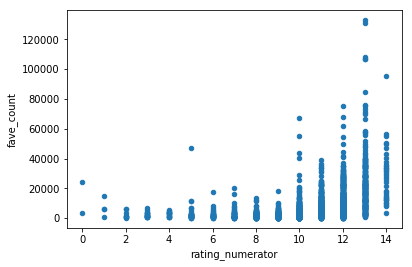

In [235]:
DogsImagesPredection.plot.scatter('rating_numerator','fave_count');

#### Finding a relation between retweets counts and the rating 


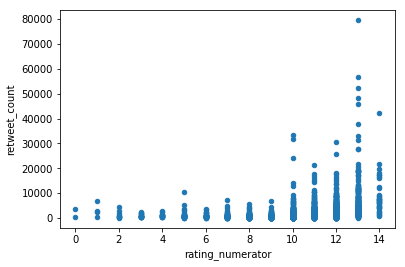

In [236]:
DogsImagesPredection.plot.scatter('rating_numerator','retweet_count');

The higher the rating the dog is reciving, the more retweets and favorates the tweet gets.

#### Predection accurecy  


In [237]:
DogsImagesPredection.p1_dog.value_counts('True')

True     0.740102
False    0.259898
Name: p1_dog, dtype: float64

In [238]:
DogsImagesPredection.p2_dog.value_counts('True')

True     0.749746
False    0.250254
Name: p2_dog, dtype: float64

In [239]:
DogsImagesPredection.p3_dog.value_counts('True')

True     0.724365
False    0.275635
Name: p3_dog, dtype: float64

the predection algorithim was aroun 70% able to detect dogs in the images

In [240]:
archive_clean.source.value_counts()

Twitter for iPhone     1962
Vine - Make a Scene      89
Twitter Web Client       30
TweetDeck                10
Name: source, dtype: int64

According to data, around 99% of the tweets are tweeted using Twitter mobile Apps (Twitter for iPhone, Vine and TweetDeck) in comparision to about only 1% using Twitter Web Client. 

This is an intersting reading reflecting the trend of using smart phones over the desktops or laptops

In [254]:
DogsImagesPredection.stage.value_counts()

                1665
pupper           202
doggo             63
puppo             22
doggopupper        9
floofer            7
doggopuppo         1
doggofloofer       1
Name: stage, dtype: int64

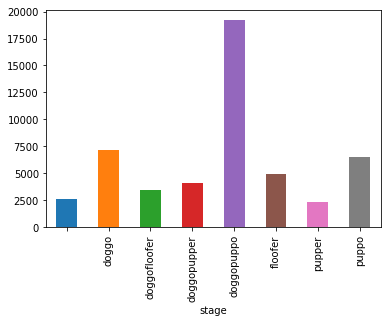

In [253]:
DogsImagesPredection.groupby('stage')['retweet_count'].mean().plot(kind='bar');

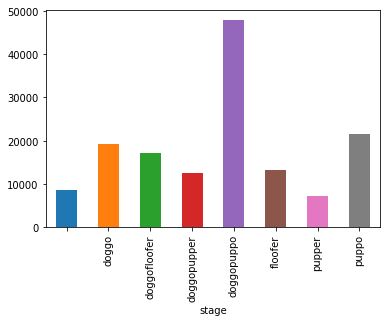

In [251]:
DogsImagesPredection.groupby('stage')['fave_count'].mean().plot.bar();